In [1]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#!wget https://www.bcn.cl/siit/obtienearchivo?id=repositorio/10221/10396/1/division_comunal.zip
#!mv obtienearchivo\?id\=repositorio%2F10221%2F10396%2F1%2Fdivision_comunal.zip comunal.zip
#!unzip comunal

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.cloud import bigquery
import seaborn as sns
import geopandas as gpd
import re

In [3]:
bq = bigquery.Client()

In [4]:
%%bigquery df
SELECT 
    * 
FROM 
    data_chile.v_asistencia 

Downloading: 100%|██████████| 10776175/10776175 [00:11<00:00, 900878.78rows/s] 


In [5]:
df.head()

,AGNO,MES_ESCOLAR,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,...,GEN_ALU_GLOSA,FEC_NAC_ALU,COD_COM_ALU,NOM_COM_ALU,DIAS_ASISTIDOS,DIAS_TRABAJADOS,ASIS_PROMEDIO,LAT_COMUNA,LONG_COMUNA,TIPO_REGION
0,2019,10,449,9,LICEO JOSE SANTOS OSSA,3,ATACAMA,33,3301,VALLENAR,...,EDUCACION PARVULARIA,200301,3301,VALLENAR,15,16,93.750000,"-28°34'372""","-70°46'12""",NORTE
1,2019,10,448,0,LICEO PEDRO TRONCOSO MACHUCA,3,ATACAMA,33,3301,VALLENAR,...,EDUCACION PARVULARIA,200311,3301,VALLENAR,10,16,62.500000,"-28°34'372""","-70°46'12""",NORTE
2,2019,11,479,0,LICEO SAN FRANCISCO,3,ATACAMA,33,3301,VALLENAR,...,ENSEÑANZA BASICA NIÑOS,201102,3301,VALLENAR,15,17,88.235294,"-28°34'372""","-70°46'12""",NORTE
3,2019,10,2715,4,ESC.BASICA MERCEDES URZUA DIAZ,6,LIB. BDO. OHIGGINS,62,6206,PAREDONES,...,EDUCACION PARVULARIA,200901,6106,GRANEROS,18,21,85.714286,"-34°39'396""","-71°53'384""",CENTRO
4,2019,10,449,9,LICEO JOSE SANTOS OSSA,3,ATACAMA,33,3301,VALLENAR,...,EDUCACION PARVULARIA,200108,3301,VALLENAR,9,16,56.250000,"-28°34'372""","-70°46'12""",NORTE


In [6]:
df.describe()

,AGNO,MES_ESCOLAR,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,RURAL_RBD,COD_DEPE,COD_ENSE,COD_ENSE2,COD_GRADO,MRUN,GEN_ALU,COD_COM_ALU,DIAS_ASISTIDOS,DIAS_TRABAJADOS,ASIS_PROMEDIO
count,10776175.0,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07,1.077618e+07
mean,2019.0,1.099839e+01,1.204064e+04,4.471738e+00,9.403722e+00,9.599156e+01,9.605555e+03,9.443034e+01,8.366568e-02,2.572117e+00,1.814414e+02,3.068302e+00,4.887941e+00,1.335109e+07,1.483032e+00,9.625744e+03,1.035633e+01,1.398597e+01,7.018684e+01
std,0.0,8.169360e-01,9.166389e+03,2.892726e+00,4.003259e+00,3.982240e+01,3.984832e+03,3.928571e+01,2.768858e-01,8.874795e-01,1.400266e+02,1.811350e+00,5.066223e+00,7.693141e+06,4.997142e-01,3.998503e+03,7.002502e+00,6.360809e+00,3.729455e+01
min,2019.0,1.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,1.101000e+03,1.100000e+01,0.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2019.0,1.000000e+01,4.664000e+03,2.000000e+00,6.000000e+00,6.100000e+01,6.107000e+03,6.100000e+01,0.000000e+00,2.000000e+00,1.100000e+02,2.000000e+00,2.000000e+00,6.683933e+06,1.000000e+00,6.108000e+03,4.000000e+00,9.000000e+00,5.555556e+01
50%,2019.0,1.100000e+01,1.006400e+04,4.000000e+00,1.000000e+01,1.010000e+02,1.010100e+04,9.200000e+01,0.000000e+00,3.000000e+00,1.100000e+02,2.000000e+00,4.000000e+00,1.336274e+07,1.000000e+00,1.010100e+04,1.300000e+01,1.700000e+01,8.750000e+01
75%,2019.0,1.200000e+01,1.775100e+04,7.000000e+00,1.300000e+01,1.310000e+02,1.312200e+04,1.340000e+02,0.000000e+00,3.000000e+00,3.100000e+02,5.000000e+00,6.000000e+00,2.004915e+07,2.000000e+00,1.312400e+04,1.600000e+01,1.900000e+01,1.000000e+02
max,2019.0,1.200000e+01,4.141800e+04,9.000000e+00,1.600000e+01,1.630000e+02,1.630500e+04,1.510000e+02,1.000000e+00,6.000000e+00,9.100000e+02,8.000000e+00,3.400000e+01,2.606861e+07,2.000000e+00,1.630500e+04,2.500000e+01,2.500000e+01,1.000000e+02


In [7]:
#Verificacion de que ninguna columna es nula
df.isnull().sum()

AGNO               0
MES_ESCOLAR        0
RBD                0
DGV_RBD            0
NOM_RBD            0
COD_REG_RBD        0
NOM_REG_RBD_A      0
COD_PRO_RBD        0
COD_COM_RBD        0
NOM_COM_RBD        0
COD_DEPROV_RBD     0
NOM_DEPROV_RBD     0
RURAL_RBD          0
RURAL_RBD_GLOSA    0
COD_DEPE           0
COD_DEPE_GLOSA     0
COD_DEPE2          0
COD_DEPE2_GLOSA    0
COD_ENSE           0
COD_ENSE_GLOSA     0
COD_ENSE2          0
COD_ENSE2_GLOSA    0
COD_GRADO          0
COD_GRADO_GLOSA    0
LET_CUR            0
MRUN               0
GEN_ALU            0
GEN_ALU_GLOSA      0
FEC_NAC_ALU        0
COD_COM_ALU        0
NOM_COM_ALU        0
DIAS_ASISTIDOS     0
DIAS_TRABAJADOS    0
ASIS_PROMEDIO      0
LAT_COMUNA         0
LONG_COMUNA        0
TIPO_REGION        0
dtype: int64

<AxesSubplot:>

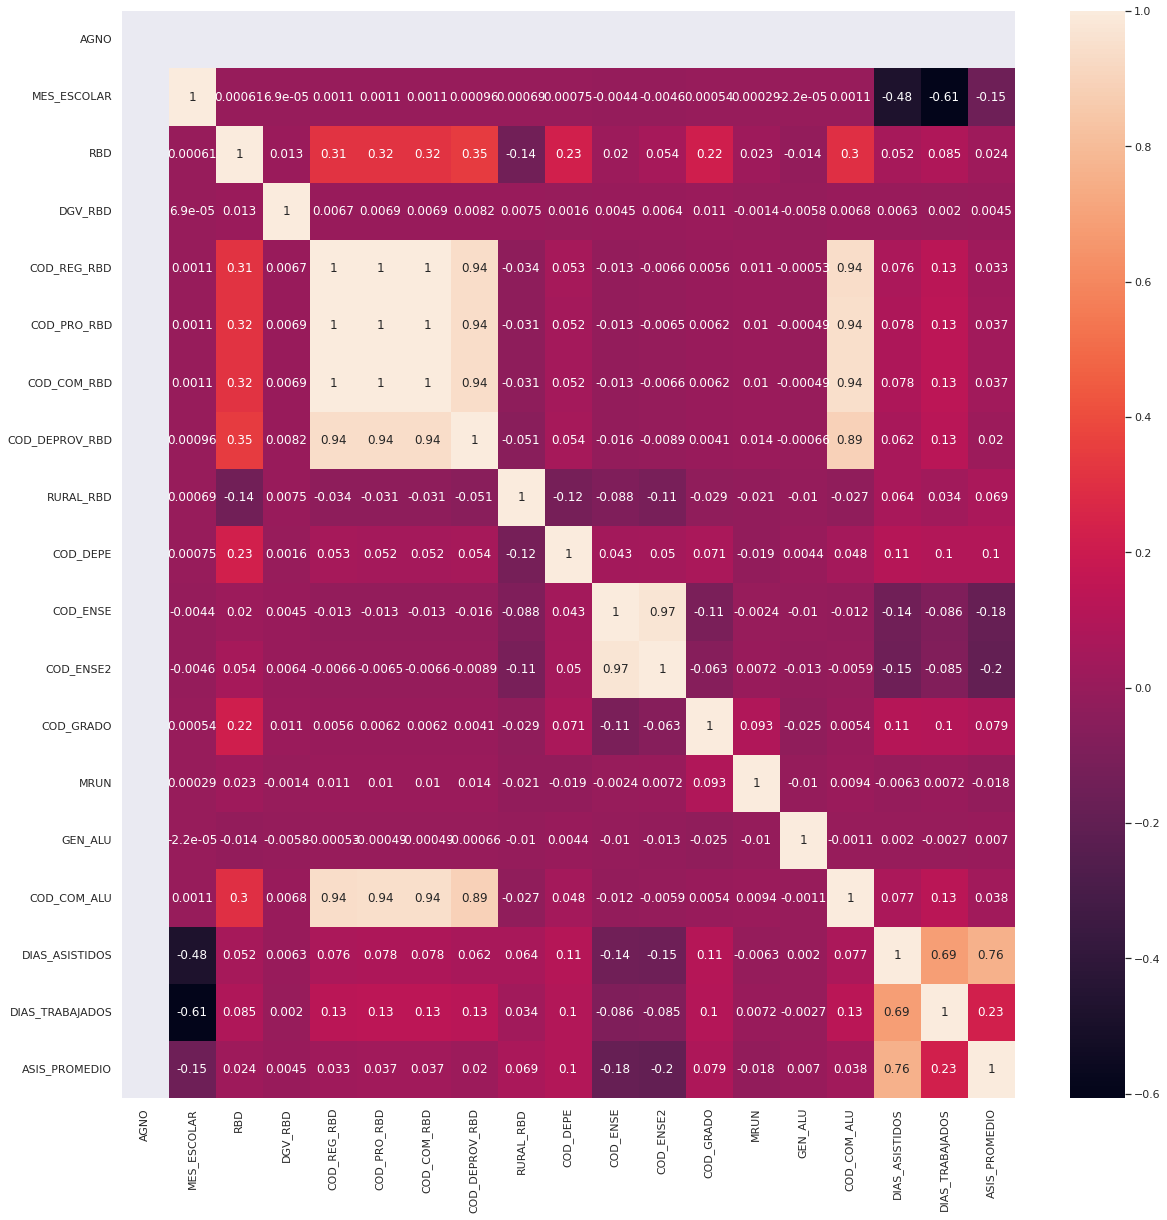

In [8]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(df.corr(), annot=True)

In [9]:
#Aqui se pueden aplicar filtros, por si fuera necesario
#df = df[df['ASIS_PROMEDIO'] > 0]

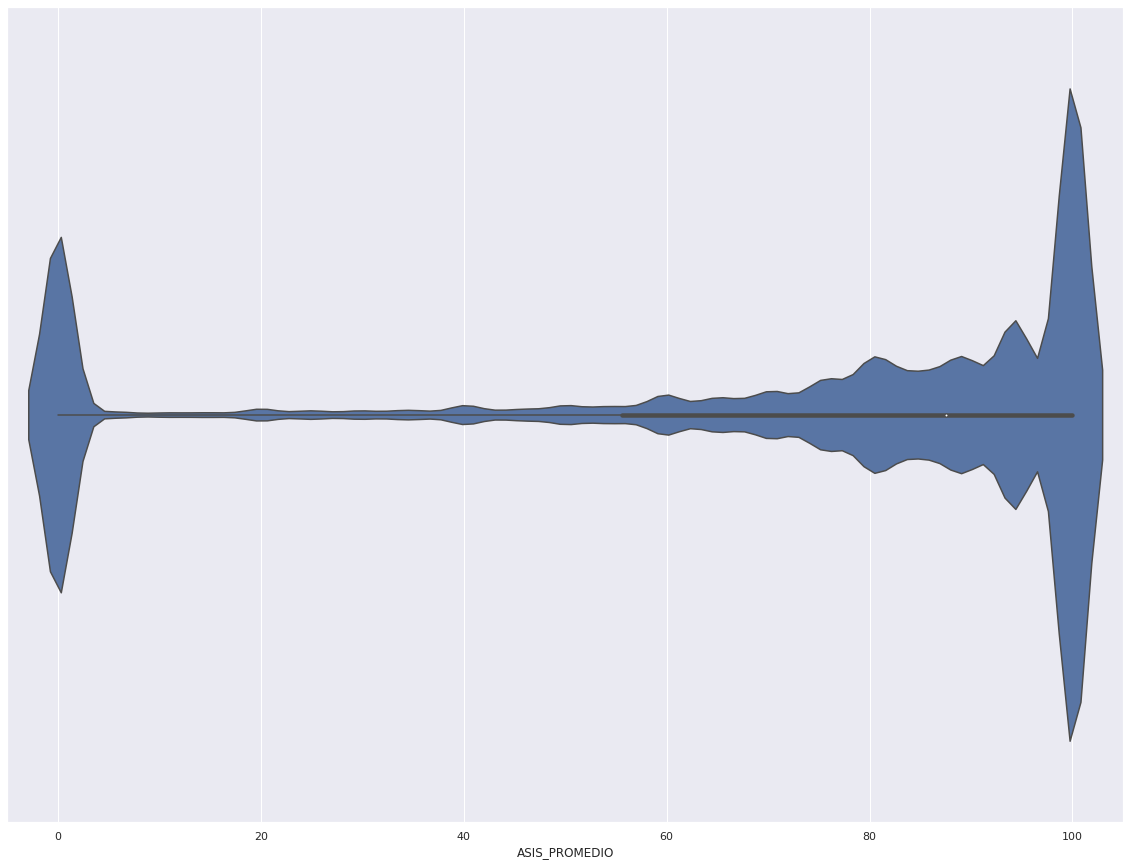

In [10]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20, 15)})
ax = sns.violinplot(data=df, x='ASIS_PROMEDIO', inner='box', orient='h')
ax.axes.set_xlim(-5, 105);

array([[<AxesSubplot:title={'center':'ASIS_PROMEDIO'}>]], dtype=object)

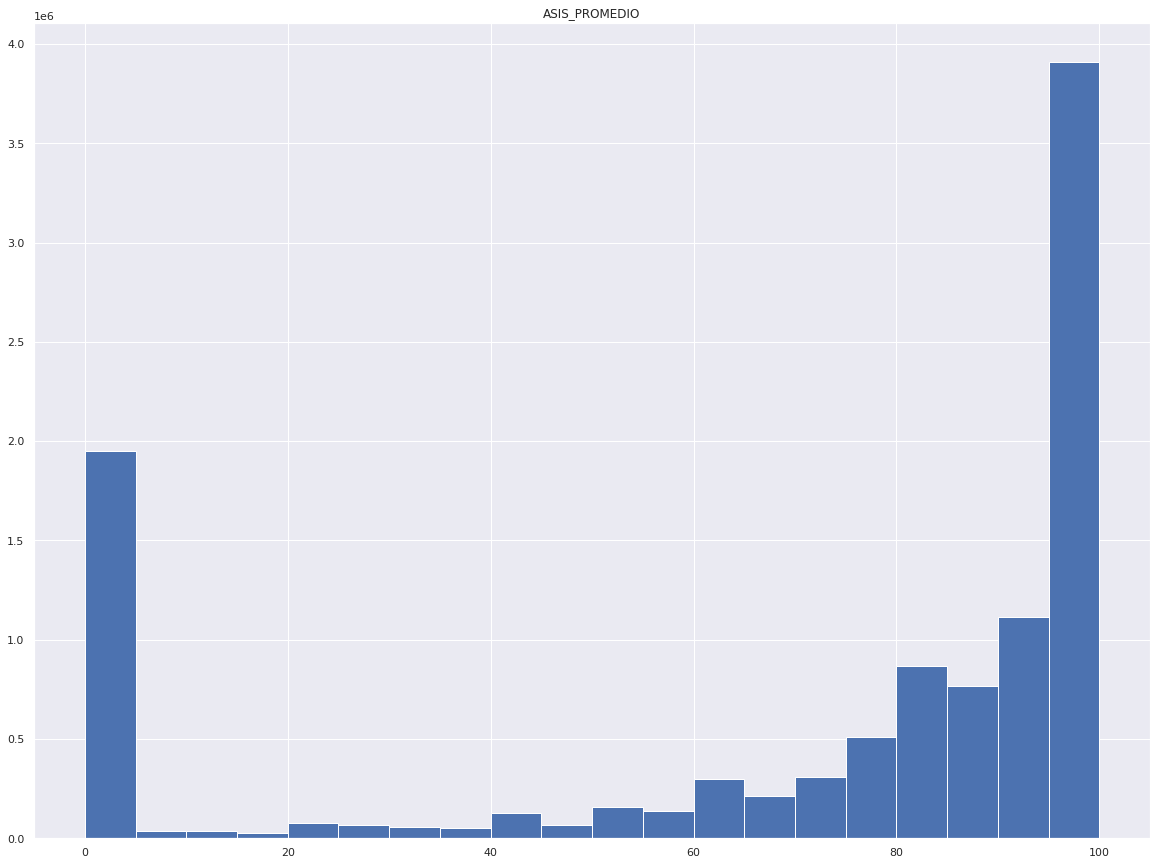

In [11]:
df.hist(column='ASIS_PROMEDIO', bins = 20)

(-10.0, 110.0)

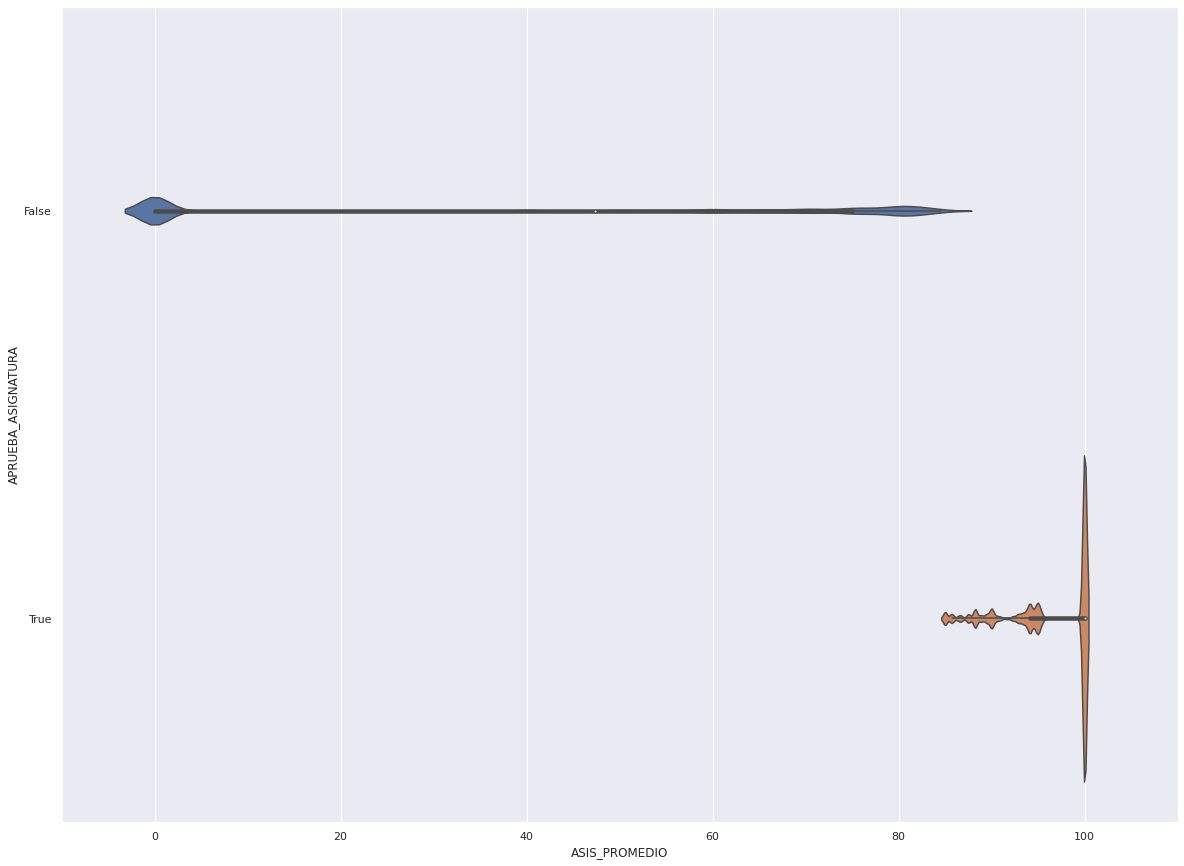

In [12]:
df['APRUEBA_ASIGNATURA'] = df['ASIS_PROMEDIO'] >=85
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20, 15)})
ax = sns.violinplot(data=df, x='ASIS_PROMEDIO', y='APRUEBA_ASIGNATURA', inner='box', orient='h')
ax.set_xlim(-10, 110)

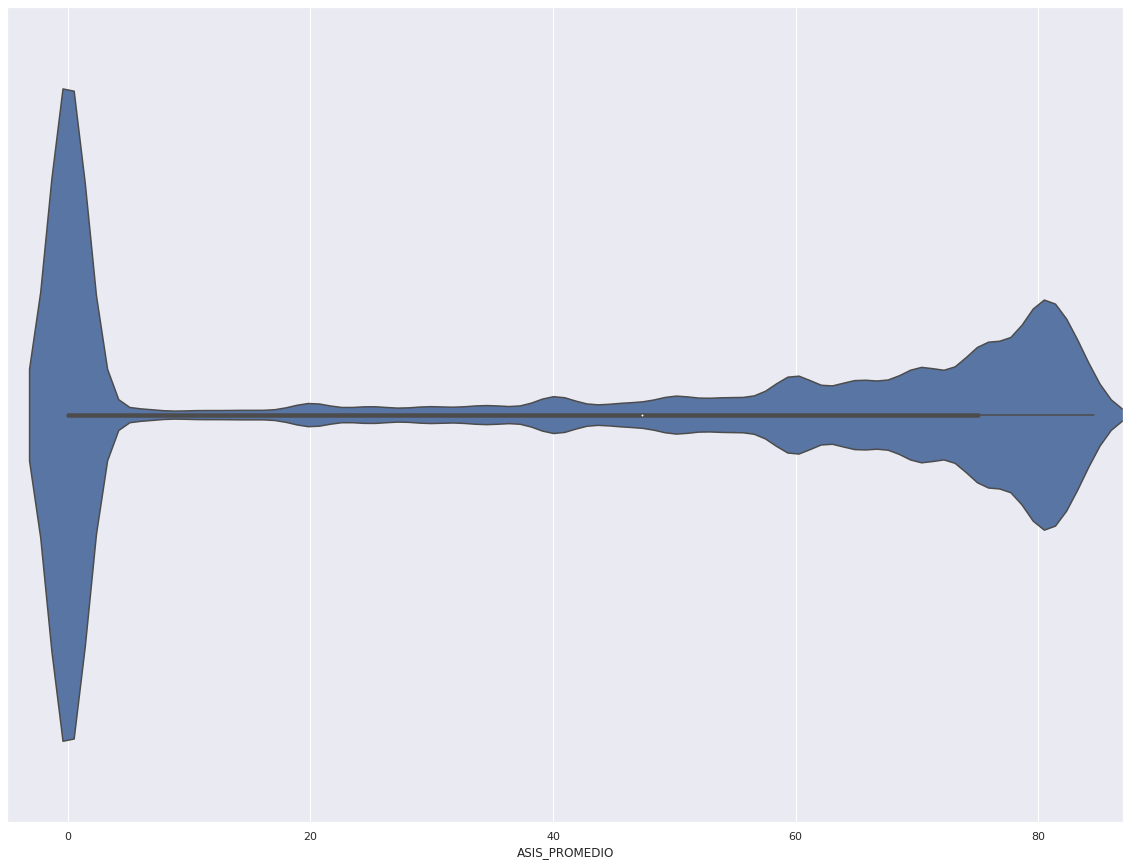

In [13]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20, 15)})
ax = sns.violinplot(data=df[df['APRUEBA_ASIGNATURA'] == False], x='ASIS_PROMEDIO', inner='box', orient='h')
ax.axes.set_xlim(-5, 87);

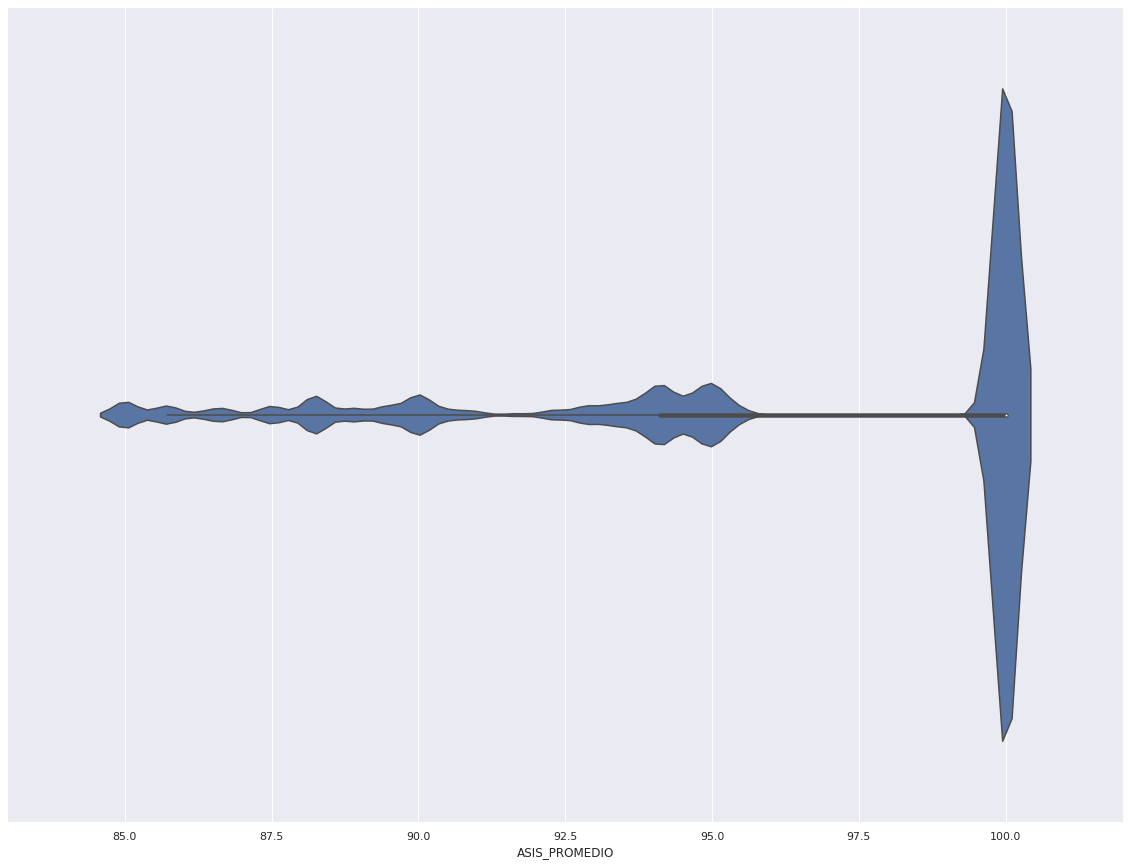

In [14]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20, 15)})
ax = sns.violinplot(data=df[df['APRUEBA_ASIGNATURA'] == True], x='ASIS_PROMEDIO', inner='box', orient='h')
ax.axes.set_xlim(83, 102);

In [15]:
%%bigquery df_v_asistencia_comuna
SELECT 
  COMUNA, 
  LATITUD_COMUNA,
  LONGITUD_COMUNA,
  PROMEDIO_ASISTENCIA,
  DESV_STD_ASISTENCIA,
  COUNT_ASISTENCIA,
  TIPO_REGION
FROM 
  `infinite-lens-352300.data_chile.v_asistencia_comuna` 
ORDER BY
    COMUNA

Downloading: 100%|██████████| 345/345 [00:01<00:00, 295.83rows/s]


In [16]:
df_v_asistencia_comuna.head()

,COMUNA,LATITUD_COMUNA,LONGITUD_COMUNA,PROMEDIO_ASISTENCIA,DESV_STD_ASISTENCIA,COUNT_ASISTENCIA,TIPO_REGION
0,ALGARROBO,"-33°22'09""","-71°40'05""",76.832264,32.972583,8624,CENTRO
1,ALHUÉ,"-34°1'588""","-71°5'60""",70.128234,26.920358,3755,CENTRO
2,ALTO BIOBÍO,"-38°37'84""","-71°19'276""",82.517442,31.593825,3994,SUR
3,ALTO DEL CARMEN,"-28°44'564""","-70°29'276""",81.363808,29.292333,2795,NORTE
4,ALTO HOSPICIO,"-20°15'252""","-70°1'192""",52.101022,44.214583,100786,NORTE


In [17]:
gdf_v_asistencia_comuna = gpd.GeoDataFrame(df_v_asistencia_comuna, crs={'init': 'epsg:4326'})

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  """Entry point for launching an IPython kernel.


In [18]:
gdf_comunas = gpd.read_file('division_comunal.shp')
gdf_comunas['COMUNA'] = gdf_comunas['NOM_COM'].apply(lambda x: x.upper())

In [19]:
gdf_v_asistencia_comuna[~gdf_v_asistencia_comuna["COMUNA"].isin(gdf_comunas["COMUNA"])]

,COMUNA,LATITUD_COMUNA,LONGITUD_COMUNA,PROMEDIO_ASISTENCIA,DESV_STD_ASISTENCIA,COUNT_ASISTENCIA,TIPO_REGION
155,LOS ÁLAMOS,"-37°37'156""","-73°27'216""",84.146693,30.881821,15857,SUR
156,LOS ÁNGELES,"-36°56'384""","-72°21'36""",78.249277,33.894143,149265,SUR
163,MARCHIHUE,"-34°23'60""","-71°37'588""",78.479000,29.122573,3068,CENTRO
168,MAULLIN,"-41°37'48""","-73°35'528""",79.364369,32.032073,7102,SUR
193,PAIGUANO,"-30°2'168""","-70°30'252""",66.900245,38.461026,2991,NORTE
325,TREHUACO,"-36°25'444""","-72°39'54""",87.403798,26.860688,2110,CENTRO
330,VICHUQUEN,"-34°49'228""","-72°2'6""",82.165367,26.896765,1831,CENTRO


In [20]:
gdf_comunas[~gdf_comunas["COMUNA"].isin(gdf_v_asistencia_comuna["COMUNA"])]

,NOM_REG,NOM_PROV,NOM_COM,SHAPE_LENG,DIS_ELEC,CIR_SENA,COD_COMUNA,SHAPE_Le_1,SHAPE_Area,geometry,COMUNA
23,Región de Los Lagos,Llanquihue,Maullín,310676.687900,57,17,1010,310676.687262,8.138924e+08,"MULTIPOLYGON (((112226.425 5383858.539, 112226...",MAULLÍN
75,Región del Libertador Bernardo O'Higgins,Cardenal Caro,Marchigüe,170038.624165,35,9,6204,170038.623784,6.586934e+08,"POLYGON ((241952.062 6211313.004, 242028.141 6...",MARCHIGÜE
97,Región de Coquimbo,Elqui,Paihuano,209582.274942,7,4,4105,209582.273978,1.497142e+09,"POLYGON ((359681.752 6684165.501, 359790.280 6...",PAIHUANO
171,Región del Bío-Bío,Ñuble,Treguaco,121960.930042,42,12,8420,121960.930415,3.156355e+08,"POLYGON ((171409.095 5973267.975, 171425.635 5...",TREGUACO
199,Región del Maule,Curicó,Vichuquén,119601.435685,36,10,7309,119601.435425,4.515873e+08,"POLYGON ((221986.708 6157530.443, 222007.926 6...",VICHUQUÉN
241,Zona sin demarcar,Zona sin demarcar,Zona sin demarcar,0.000000,0,0,0,252805.153672,3.937432e+09,"POLYGON ((161742.674 4543513.058, 217703.370 4...",ZONA SIN DEMARCAR
281,Región del Bío-Bío,Arauco,Los Alamos,191513.658139,46,13,8206,191513.657109,6.025204e+08,"POLYGON ((109217.504 5835496.934, 109284.392 5...",LOS ALAMOS
287,Región del Bío-Bío,Bío-Bío,Los Angeles,257441.723986,47,13,8301,257441.724720,1.752319e+09,"POLYGON ((223166.340 5880718.388, 223241.051 5...",LOS ANGELES


In [21]:
gdf_comunas['COMUNA'] = gdf_comunas['COMUNA'].str.replace('MAULLÍN','MAULLIN')
gdf_comunas['COMUNA'] = gdf_comunas['COMUNA'].str.replace('MARCHIGÜE','MARCHIHUE')
gdf_comunas['COMUNA'] = gdf_comunas['COMUNA'].str.replace('PAIHUANO','PAIGUANO')
gdf_comunas['COMUNA'] = gdf_comunas['COMUNA'].str.replace('TREGUACO','TREHUACO')
gdf_comunas['COMUNA'] = gdf_comunas['COMUNA'].str.replace('VICHUQUÉN','VICHUQUEN')
gdf_comunas['COMUNA'] = gdf_comunas['COMUNA'].str.replace('LOS ALAMOS','LOS ÁLAMOS')
gdf_comunas['COMUNA'] = gdf_comunas['COMUNA'].str.replace('LOS ANGELES','LOS ÁNGELES')

In [22]:
gdf_aux = gdf_v_asistencia_comuna.merge(gdf_comunas, on= 'COMUNA')

In [24]:
def plot_map(df, figsize = (10, 40), legend= False, shrink = 1):
    
    #white, dark, whitegrid, darkgrid, ticks
    sns.set_style('darkgrid')
    df.plot(
        column='PROMEDIO_ASISTENCIA',
        cmap='RdPu',
        linewidth=0.9,
        #ax=ax,
        edgecolor='1',
        legend=legend, 
        legend_kwds={
            'shrink': shrink
        },
        missing_kwds={
            "color": "lightgrey",
            "label": "Missing values",
        }, 
        figsize=figsize,
        aspect=1)

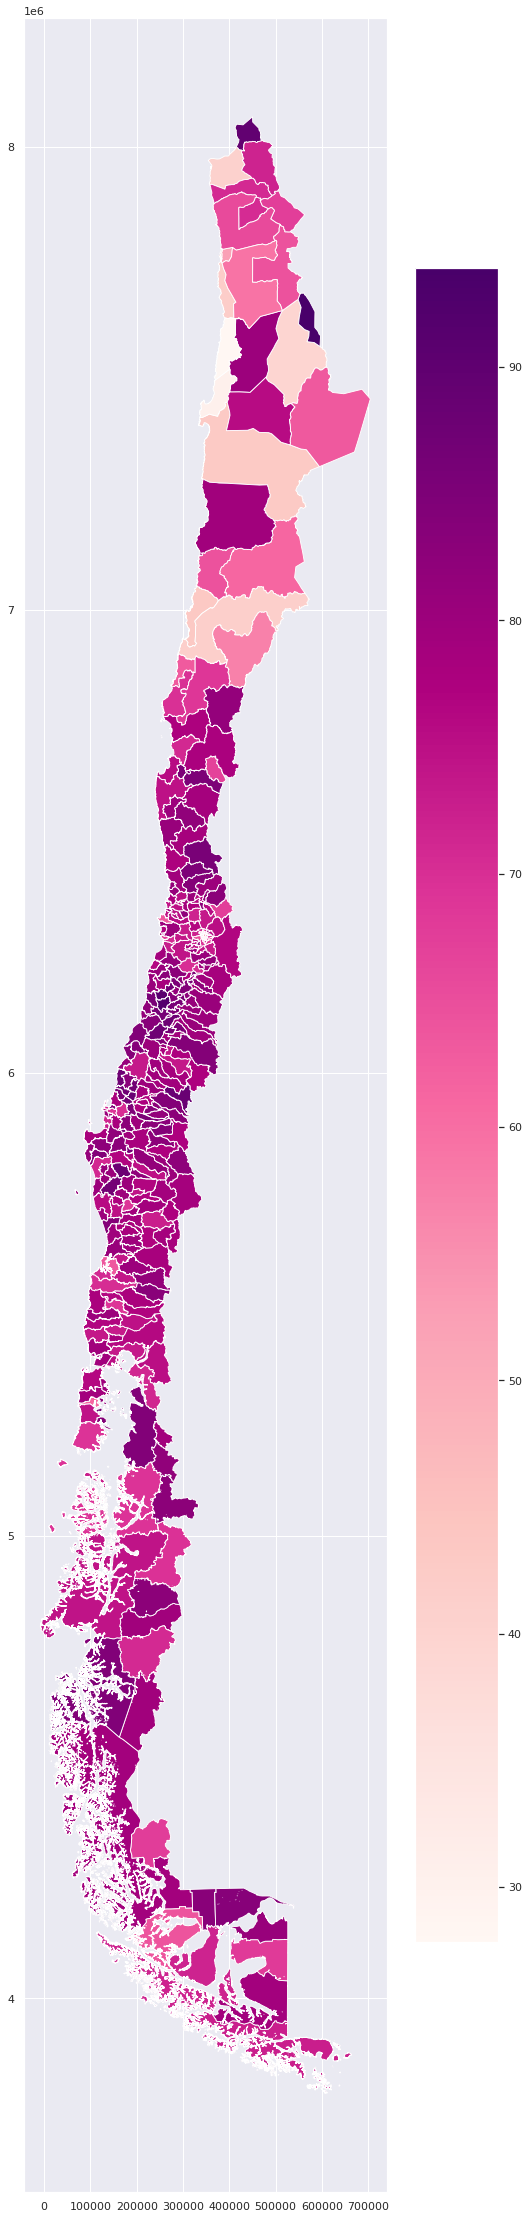

In [25]:
gdf_aux_chile_continental = gdf_aux[
    (
        (gdf_aux['COMUNA'] != 'ISLA DE PASCUA') &
        (gdf_aux['COMUNA'] != 'JUAN FERNÁNDEZ') 
    )
]
plot_map(gdf_aux_chile_continental, legend= True)

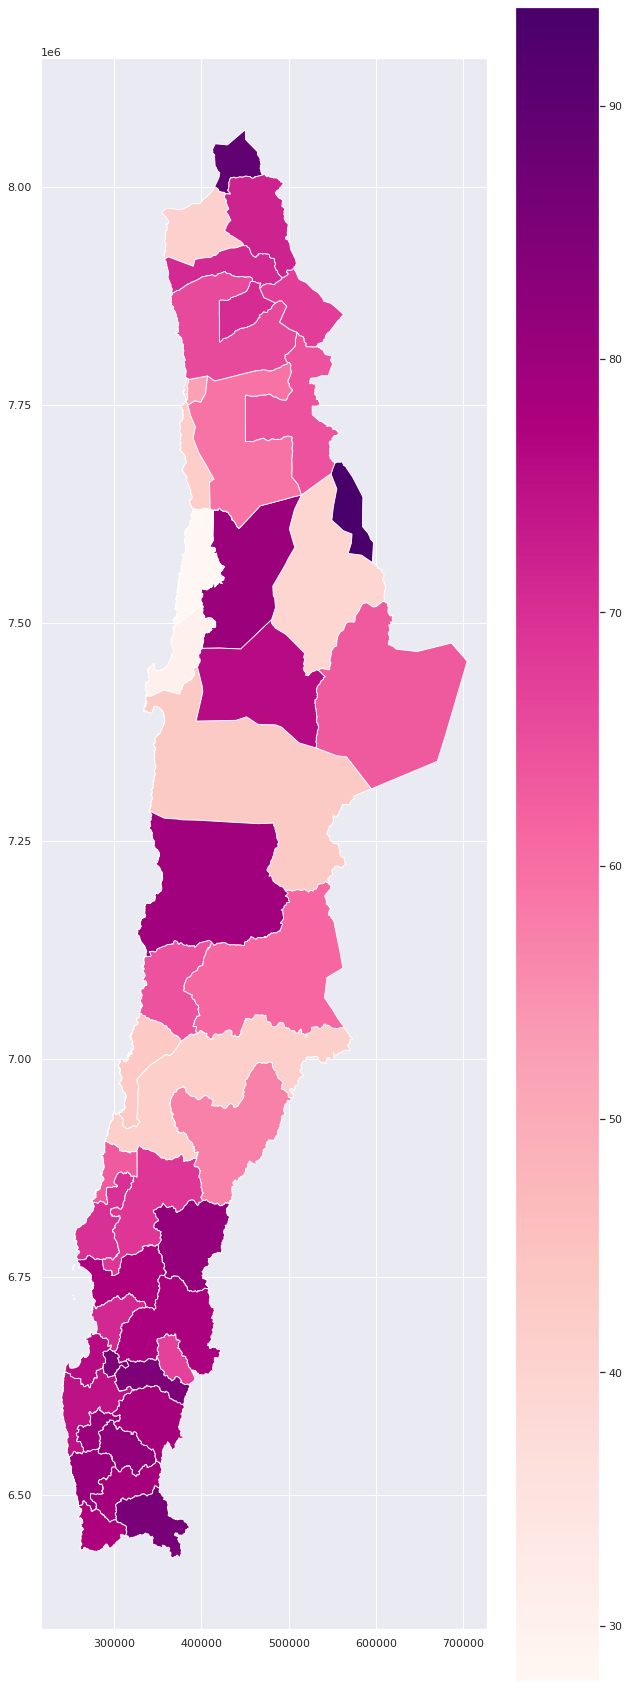

In [26]:
gdf_aux_chile_continental_norte = gdf_aux[
    (
        (gdf_aux['TIPO_REGION'] == 'NORTE') & 
        (
            (gdf_aux['COMUNA'] != 'ISLA DE PASCUA') &
            (gdf_aux['COMUNA'] != 'JUAN FERNÁNDEZ') 
        )
    )
]
plot_map(gdf_aux_chile_continental_norte, legend= True)

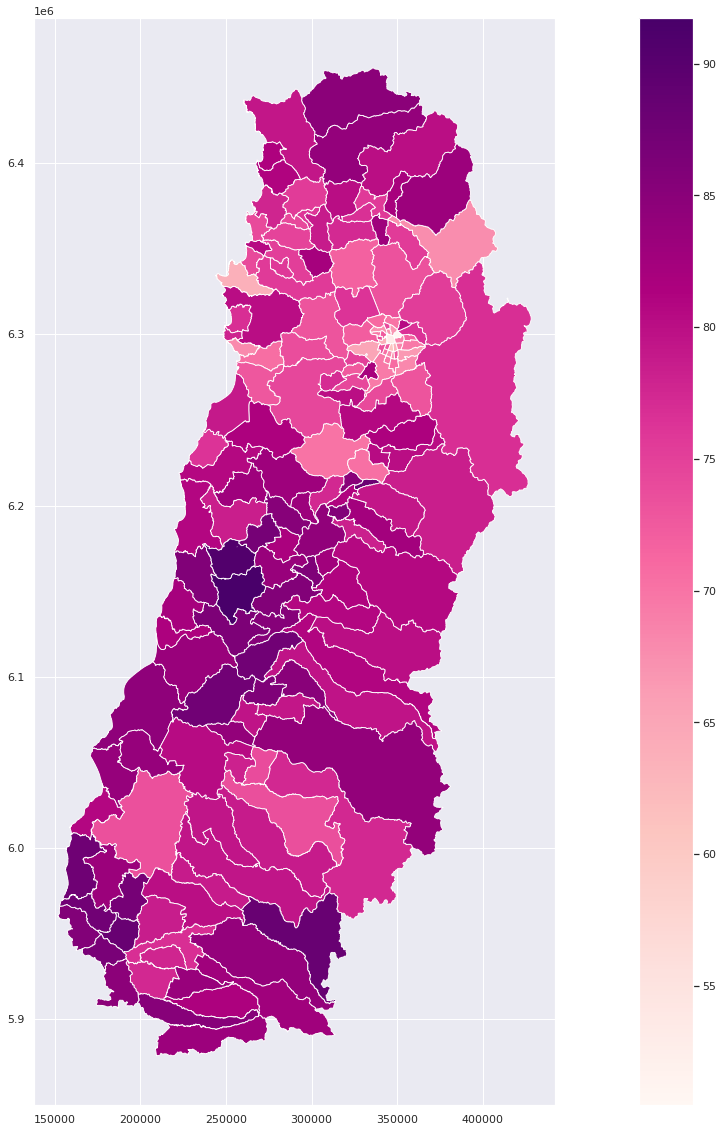

In [27]:
gdf_aux_chile_continental_centro = gdf_aux[
    (
        (gdf_aux['TIPO_REGION'] == 'CENTRO') & 
        (
            (gdf_aux['COMUNA'] != 'ISLA DE PASCUA') &
            (gdf_aux['COMUNA'] != 'JUAN FERNÁNDEZ') 
        )
    )
]
plot_map(gdf_aux_chile_continental_centro, figsize = (30, 20),legend= True)

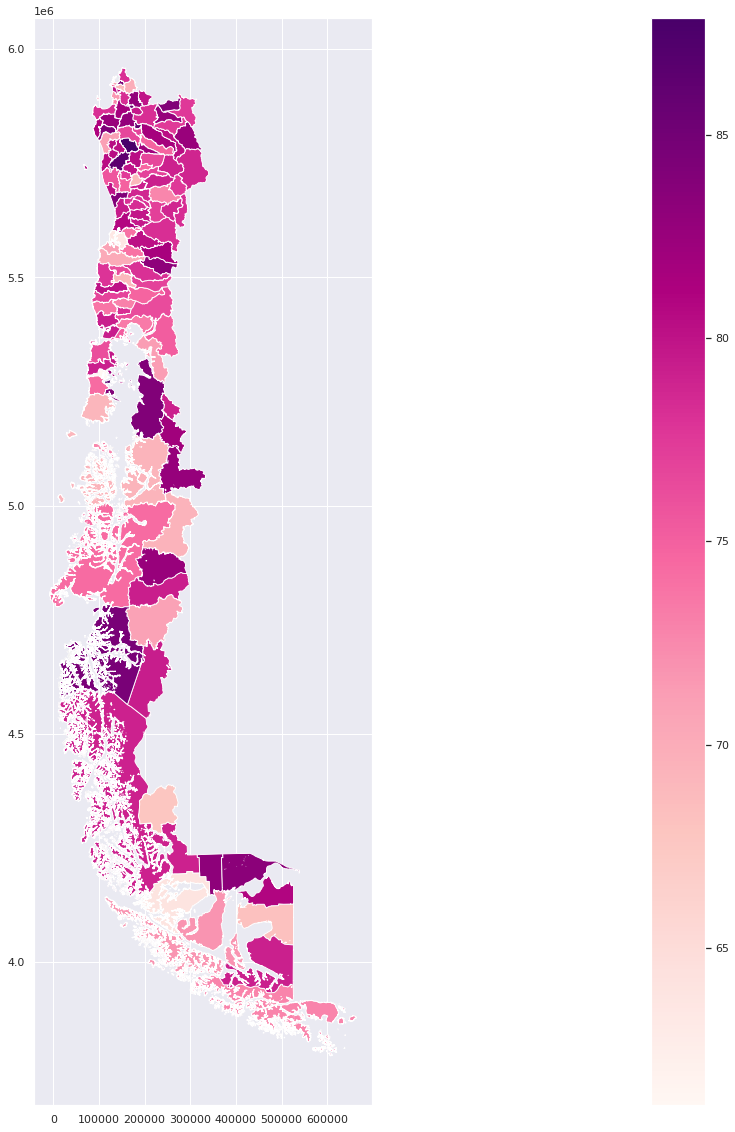

In [28]:
gdf_aux_chile_continental_sur = gdf_aux[
    (
        (gdf_aux['TIPO_REGION'] == 'SUR') & 
        (
            (gdf_aux['COMUNA'] != 'ISLA DE PASCUA') &
            (gdf_aux['COMUNA'] != 'JUAN FERNÁNDEZ') 
        )
    )
]
plot_map(gdf_aux_chile_continental_sur, figsize = (100, 20),legend= True)


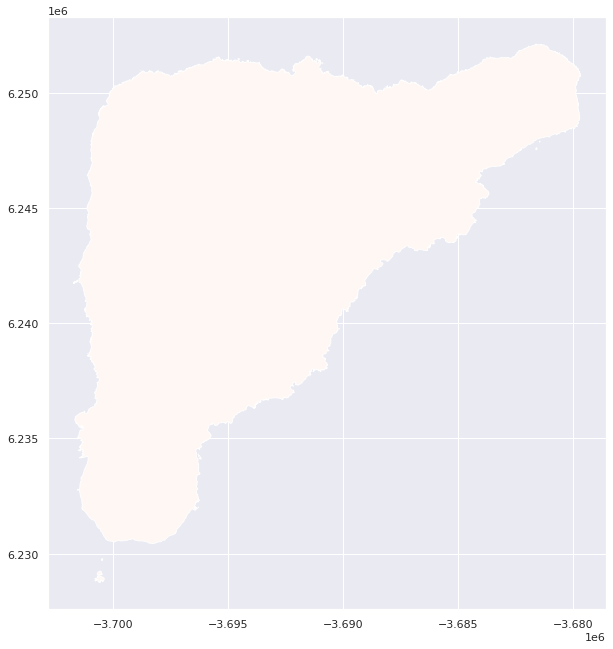

In [29]:
gdf_aux_chile_isla_pascua = gdf_aux[
    (gdf_aux['COMUNA'] == 'ISLA DE PASCUA')
]
gdf_aux_chile_isla_pascua
plot_map(gdf_aux_chile_isla_pascua)

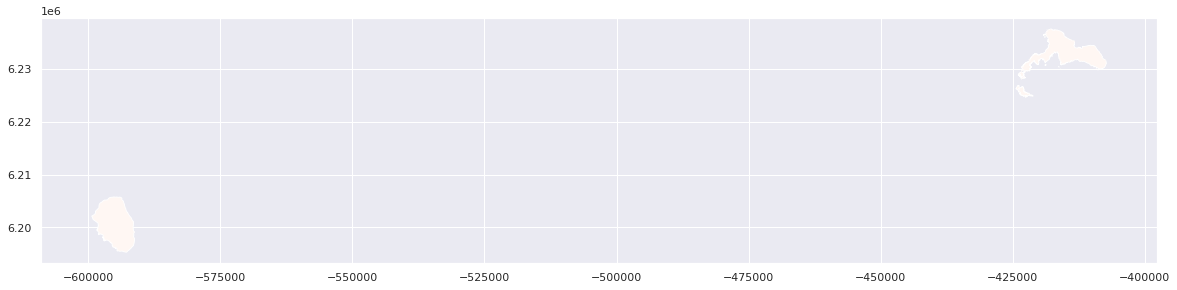

In [30]:
gdf_aux_chile_juan_fernandez = gdf_aux[
    (gdf_aux['COMUNA'] == 'JUAN FERNÁNDEZ')
]
gdf_aux_chile_juan_fernandez
plot_map(gdf_aux_chile_juan_fernandez, figsize = (20, 100),)

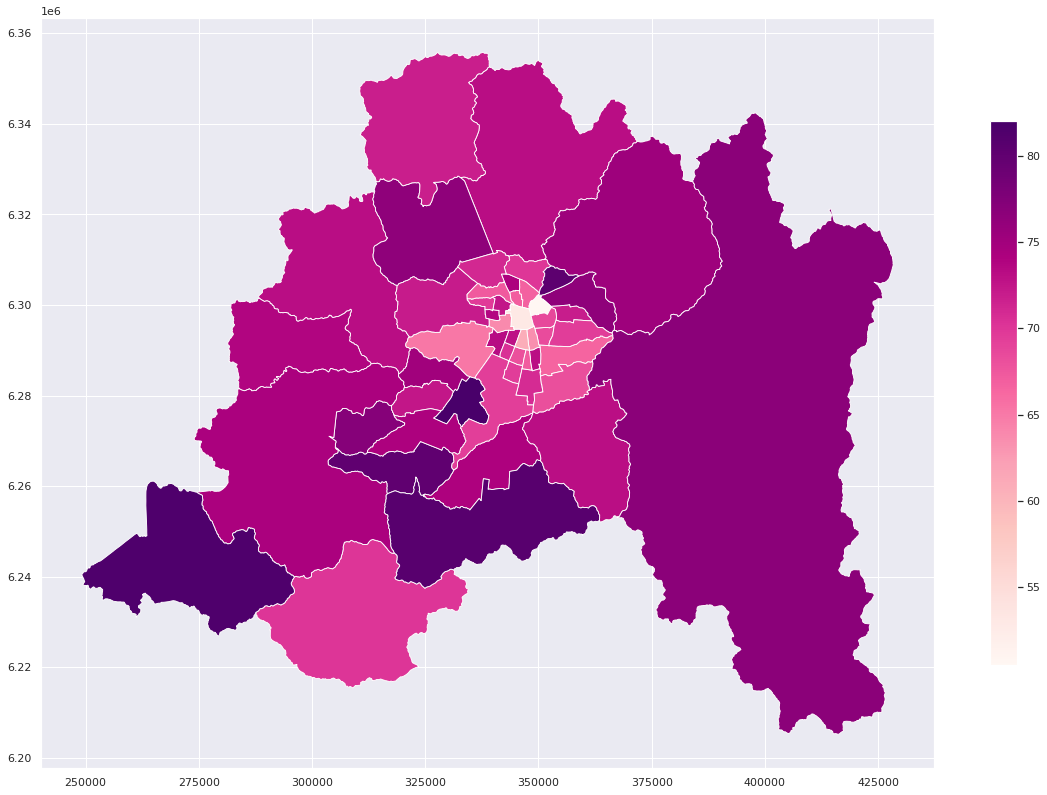

In [31]:
gdf_aux_chile_reg_met = gdf_aux[
    (gdf_aux['NOM_REG'] == 'Región Metropolitana de Santiago')
]
gdf_aux_chile_reg_met
plot_map(gdf_aux_chile_reg_met, figsize = (20, 100), legend= True, shrink = 0.1)